In [1]:
setwd(fs::path_abs("~/Local_Workspace/TesiMag"))

source("src/paths/paths.R")
source("src/load/load.R")

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

terra 1.7.55



In [2]:
# Separating SCIA in multiple files
library(dplyr, warn.conflicts = FALSE)
library(sf, warn.conflicts = FALSE)
library(stars, warn.conflicts = FALSE)
tvar <- "T_MIN"
# dem <- load.DEM.COP30()
dem <- read_stars("temp/dem/dem30.tif")


Caricamento del pacchetto richiesto: abind



In [3]:
path_official <- fs::path_abs("/Users/davidenicoli/Local_Workspace/Datasets/SCIA/stazioni/scia_ufficiale.csv")
m.scia <- load.metadata("SCIA", tvar) |> filter(last_year > 2005)
m.scia <- bind_cols(m.scia, st_extract(dem, m.scia) |> st_drop_geometry() |> rename(dem = 1))
m.scia.off <- read_csv_arrow(path_official, skip = 1, col_types = "fccddd", col_names = c("rete", "anagrafica", "user_code", "lon", "lat", "elevation")) |>
    st_as_sf(coords = c("lon", "lat"), crs = 4326) |>
    mutate(ID = row_number())
m.scia.off <- bind_cols(m.scia.off, st_extract(dem, m.scia.off) |> st_drop_geometry() |> rename(dem = 1))


Cache found: SCIA/T_MIN, suffix: <>, loading from disk



In [4]:
m.scia.off |> filter(abs(elevation - dem) > 100) |> st_drop_geometry()

,rete,anagrafica,user_code,elevation,ID,dem
,<fct>,<chr>,<chr>,<dbl>,<int>,<dbl>
1,UCEA-RAN,Caprarola,00214,650,5,513.5309
2,UCEA-RAN,Pietranera,00230,158,26,311.8259
3,UCEA-UCST,Affi,00404,191,46,348.9195
4,UCEA-UCST,Amelia,00337,406,52,287.2798
5,UCEA-UCST,Cadino,00405,964,61,1510.4857
6,UCEA-UCST,Catanzaro,00430,400,69,282.8528
7,UCEA-UCST,Chiavenna,00349,332,71,480.5941
8,UCEA-UCST,Civitanova d. Sannio,00412,650,73,992.4952
9,UCEA-UCST,Claut,00350,600,74,952.1271


In [5]:
m.scia.off |> st_drop_geometry() |> print()

# A tibble: 11,693 x 6
   rete     anagrafica             user_code elevation    ID    dem
 * <fct>    <chr>                  <chr>         <dbl> <int>  <dbl>
 1 UCEA-RAN Albenga                00506             8     1   8.93
 2 UCEA-RAN Aliano                 00227           250     2 186.  
 3 UCEA-RAN Borgo San Michele      00216            12     3  22.6 
 4 UCEA-RAN Campochiaro            00218           502     4 510.  
 5 UCEA-RAN Caprarola              00214           650     5 514.  
 6 UCEA-RAN Carpeneto              00198           230     6 281.  
 7 UCEA-RAN Castel di Sangro       00217           810     7 825.  
 8 UCEA-RAN Castel Volturno Disspa 00222             4     8   4.36
 9 UCEA-RAN CESENA                 00503            46     9  43.9 
10 UCEA-RAN Chilivani              00233           216    10 210.  
# i 11,683 more rows


In [6]:
m.scia |>
    st_drop_geometry() |>
    group_by(rete) |>
    summarise(count = n())


rete,count
<fct>,<int>
Regionale ARPA Liguria,144
Idrografica,1801
Regionale ARPA Veneto,129
RETE SARDEGNA 2022,524
RETE EMILIA ROMAGNA TEMP,38
Regionale ARSIAL Lazio,91
Regionale ARPA Sardegna,45
RETE SICILIA OSS. ACQUE TEMP,93
Mareografica,34


In [7]:
m.scia.off |>
    st_drop_geometry() |>
    group_by(rete) |>
    summarise(count = n())


rete,count
<fct>,<int>
UCEA-RAN,45
UCEA-UCST,100
UCEA-UCOS,98
REGIONI - ex SIMN,4464
Sinottica,245
Mareografica,34
Idrografica,5263
Regionale ARPA ER,90
Regionale ARPA FVG,30


In [8]:
joined.1 <- st_join(m.scia, m.scia.off, left = FALSE) |>
    st_drop_geometry() |>
    filter(user_code.x == user_code.y)
m.scia.1 <- anti_join(m.scia, joined.1, by = "identifier")
m.scia.off.1 <- anti_join(m.scia.off, joined.1, by = "ID")

In [9]:
joined.2 <- st_join(m.scia.1, m.scia.off.1, st_is_within_distance, dist = units::set_units(500, "m"), left = FALSE) |>
    st_drop_geometry() |>
    filter(str_squish(anagrafica.x) |> str_to_lower() == str_squish(anagrafica.y) |> str_to_lower())
j2.a <- joined.2 |> group_by(identifier) |> filter(n() == 1, .preserve = FALSE) |> ungroup()
j2.b <- joined.2 |> anti_join(j2.a, by = c("identifier", "ID")) |> filter(elevation.x == elevation.y, ID != 47, ID != 110) # Esclusione di Ala' dei Sardi e Orzieri
joined.2 <- bind_rows(j2.a, j2.b)

m.scia.2 <- anti_join(m.scia.1, joined.2, by = "identifier")
m.scia.off.2 <- anti_join(m.scia.off.1, joined.2, by = "ID")

In [10]:
joined.3 <- st_join(m.scia.2, m.scia.off.2, st_is_within_distance, dist = units::set_units(10, "m"), left = FALSE) |>
    st_drop_geometry()
m.scia.3 <- anti_join(m.scia.2, joined.3, by = "identifier")
m.scia.off.3 <- anti_join(m.scia.off.2, joined.3, by = "ID")

In [11]:
joined.4 <- st_join(m.scia.3, m.scia.off.3, st_is_within_distance, dist = units::set_units(50, "m"), left = FALSE) |>
    st_drop_geometry() |>
    filter(abs(elevation.x - elevation.y) < 10)
m.scia.4 <- anti_join(m.scia.3, joined.4, by = "identifier")
m.scia.off.4 <- anti_join(m.scia.off.3, joined.4, by = "ID")

In [12]:
joined.5 <- st_join(m.scia.4, m.scia.off.4, st_is_within_distance, dist = units::set_units(3, "km"), left = FALSE) |>
    st_drop_geometry() |>
    filter(str_squish(anagrafica.x) |> str_to_lower() == str_squish(anagrafica.y) |> str_to_lower())
j5.a <- joined.5 |> group_by(identifier) |> filter(n() == 1, .preserve = FALSE) |> ungroup()
j5.b <- joined.5 |> anti_join(j5.a, by = c("identifier", "ID")) |> filter(elevation.x == elevation.y, ID != 47, ID != 440) # Esclusione di Ala' dei Sardi e Orzieri
joined.5 <- bind_rows(j5.a, j5.b)

m.scia.5 <- anti_join(m.scia.4, joined.5, by = "identifier")
m.scia.off.5 <- anti_join(m.scia.off.4, joined.5, by = "ID")

In [13]:
joined.6 <- st_join(m.scia.5, m.scia.off.5, st_is_within_distance, dist = units::set_units(100, "m"), left = FALSE) |>
    st_drop_geometry()
m.scia.6 <- anti_join(m.scia.5, joined.6, by = "identifier")
m.scia.off.6 <- anti_join(m.scia.off.5, joined.6, by = "ID")

In [21]:
source("src/load/load.R")
abb <- load.series("SCIA", "T_MIN") |> semi_join(st_drop_geometry(m.scia) |> filter(str_detect(str_to_lower(anagrafica), "abbasanta")), by = "identifier")

Cache found: SCIA/T_MIN, suffix: <>, loading from disk



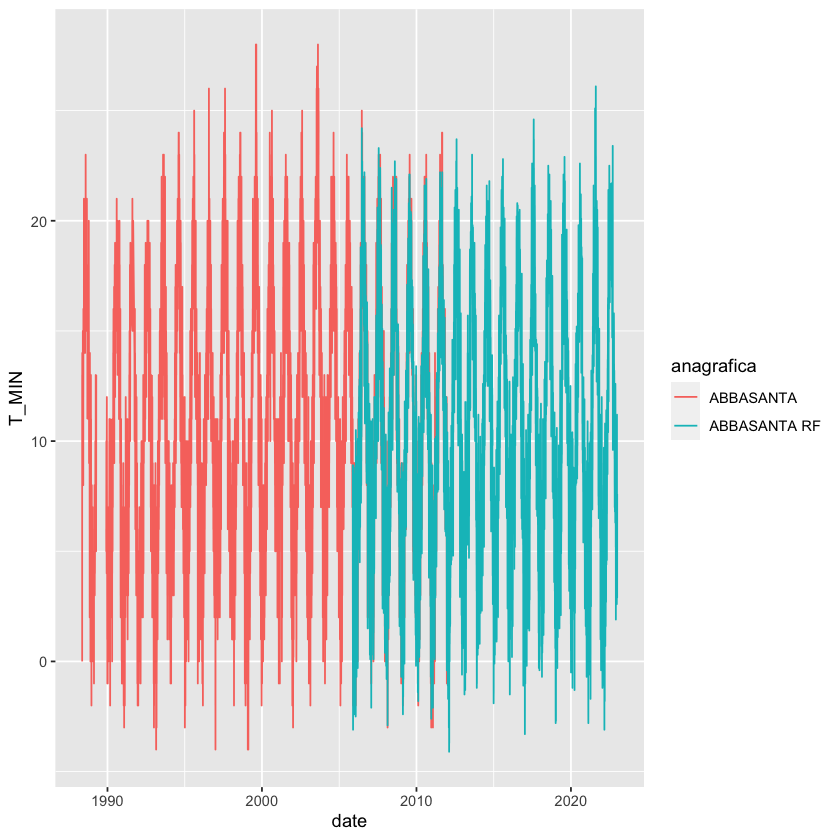

In [25]:
library(ggplot2)
ggplot(abb |> left_join(m.scia, by = "identifier")) + geom_line(aes(date, T_MIN, color = anagrafica))

In [14]:
m.scia.5 |> st_drop_geometry()

,identifier,last_year,first_year,net_code,user_code,elevation,valid_days,state,province,anagrafica,rete,dem
,<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,<chr>,<fct>,<dbl>
1,14935,2022,2005,54,OR009B501,328,6255,Sardegna,Oristano,ABBASANTA RF,RETE SARDEGNA 2022,320.705750
2,12491,2022,2004,38,00001,457,6897,Lazio,Viterbo,ACQUAPENDENTE,Regionale ARSIAL Lazio,454.631104
3,14944,2020,2006,54,SS005B502,431,5448,Sardegna,Olbia-Tempio,AGLIENTU RF,RETE SARDEGNA 2022,423.517212
4,15118,2020,1997,54,SS005S245,83,7991,Sardegna,Olbia-Tempio,AGLIENTU RU,RETE SARDEGNA 2022,60.480751
5,12492,2022,2004,38,00002,458,6861,Lazio,Roma,AGOSTA,Regionale ARSIAL Lazio,439.243866
6,13953,2022,1924,51,1810,175,35721,Sicilia,Agrigento,AGRIGENTO,RETE SICILIA OSS. ACQUE TEMP,182.136490
7,15143,2020,2017,54,SS046B720,614,1330,Sardegna,Olbia-Tempio,ALA DEI SARDI MAZZINAIU,RETE SARDEGNA 2022,603.000793
8,14958,2022,2006,54,SS046B503,665,6178,Sardegna,Olbia-Tempio,ALA' DEI SARDI RF,RETE SARDEGNA 2022,666.231995
9,15144,2020,2018,54,SS046S270,603,757,Sardegna,Olbia-Tempio,ALA' DEI SARDI RU,RETE SARDEGNA 2022,619.464539


In [68]:
joined.6 |>
    group_by(identifier) |>
    filter(n() > 1)


identifier,last_year,first_year,net_code,user_code.x,elevation.x,valid_days,state,province,anagrafica.x,rete.x,dem.x,rete.y,anagrafica.y,user_code.y,elevation.y,ID,dem.y
<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,<chr>,<fct>,<dbl>,<fct>,<chr>,<chr>,<dbl>,<int>,<dbl>


In [69]:
joined.6 |>
    group_by(ID) |>
    filter(n() > 1)

identifier,last_year,first_year,net_code,user_code.x,elevation.x,valid_days,state,province,anagrafica.x,rete.x,dem.x,rete.y,anagrafica.y,user_code.y,elevation.y,ID,dem.y
<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,<chr>,<fct>,<dbl>,<fct>,<chr>,<chr>,<dbl>,<int>,<dbl>
15073,2022,2018,54,NU077B786,784,1307,Sardegna,Ogliastra,GAIRO TAQUISARA ARST,RETE SARDEGNA 2022,841.2401,Idrografica,Gairo Taquisara F.C.,20364,843,6793,841.2401
14688,2012,1987,54,NU077B067,784,8950,Sardegna,Ogliastra,GAIRO TASQUISARA,RETE SARDEGNA 2022,841.2401,Idrografica,Gairo Taquisara F.C.,20364,843,6793,841.2401


In [70]:
m.scia.off |> filter(str_detect(str_to_lower(anagrafica), "gairo")) |> st_drop_geometry()

,rete,anagrafica,user_code,elevation,ID,dem
,<fct>,<chr>,<chr>,<dbl>,<int>,<dbl>
1,REGIONI - ex SIMN,Gairo Taquisara F.C.,04301,784,1826,922.2874
2,Idrografica,Gairo Taquisara F.C.,20364,843,6793,841.2401


In [27]:
m.scia.4 |> st_drop_geometry()

,identifier,last_year,first_year,net_code,user_code,elevation,valid_days,state,province,anagrafica,rete,dem
,<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,<chr>,<fct>,<dbl>
1,14935,2022,2005,54,OR009B501,328,6255,Sardegna,Oristano,ABBASANTA RF,RETE SARDEGNA 2022,320.705750
2,12490,2022,2005,38,00078,1171,6237,Lazio,Rieti,ACCUMOLI,Regionale ARSIAL Lazio,1159.509033
3,14098,2021,1929,51,3150,194,29129,Sicilia,Catania,ACIREALE,RETE SICILIA OSS. ACQUE TEMP,196.012650
4,12491,2022,2004,38,00001,457,6897,Lazio,Viterbo,ACQUAPENDENTE,Regionale ARSIAL Lazio,454.631104
5,14944,2020,2006,54,SS005B502,431,5448,Sardegna,Olbia-Tempio,AGLIENTU RF,RETE SARDEGNA 2022,423.517212
6,15118,2020,1997,54,SS005S245,83,7991,Sardegna,Olbia-Tempio,AGLIENTU RU,RETE SARDEGNA 2022,60.480751
7,12492,2022,2004,38,00002,458,6861,Lazio,Roma,AGOSTA,Regionale ARSIAL Lazio,439.243866
8,13953,2022,1924,51,1810,175,35721,Sicilia,Agrigento,AGRIGENTO,RETE SICILIA OSS. ACQUE TEMP,182.136490
9,15143,2020,2017,54,SS046B720,614,1330,Sardegna,Olbia-Tempio,ALA DEI SARDI MAZZINAIU,RETE SARDEGNA 2022,603.000793


### Casi specifici

#### Ala' dei Sardi

In [173]:
m.scia |> filter(anagrafica == "ALA' DEI SARDI") |> st_geometry()

POINT (9.329331 40.65056)



Geometry set for 1 feature 
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 9.329331 ymin: 40.65056 xmax: 9.329331 ymax: 40.65056
Geodetic CRS:  WGS 84

In [178]:
m.scia.off |> filter(anagrafica == "Ala' dei Sardi") |> print()

Simple feature collection with 2 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 9.329722 ymin: 40.64972 xmax: 9.33333 ymax: 40.65
Geodetic CRS:  WGS 84
# A tibble: 2 x 6
  rete            anagrafica user_code elevation             geometry    ID
* <fct>           <chr>      <chr>         <dbl> <POINT [arc_degree]> <int>
1 UCEA-UCST       Ala' dei ~ 00333           663      (9.33333 40.65)    47
2 REGIONI - ex S~ Ala' dei ~ 04250           663  (9.329722 40.64972)   298


Da controllo manuale il migliore è il dato WFS. UCEA-UCST è evidentemente troncato

#### Ozieri

In [181]:
m.scia |> filter(anagrafica == "OZIERI" & identifier == 14828) |> st_geometry()

POINT (9.003462 40.58445)



Geometry set for 1 feature 
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 9.003462 ymin: 40.58445 xmax: 9.003462 ymax: 40.58445
Geodetic CRS:  WGS 84

In [180]:
m.scia.off |> filter(anagrafica == "Ozieri") |> print()

Simple feature collection with 3 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 9 ymin: 40.58333 xmax: 9.0036 ymax: 40.5845
Geodetic CRS:  WGS 84
# A tibble: 3 x 6
  rete            anagrafica user_code elevation             geometry    ID
* <fct>           <chr>      <chr>         <dbl> <POINT [arc_degree]> <int>
1 UCEA-UCST       Ozieri     00372           390         (9 40.58333)   110
2 REGIONI - ex S~ Ozieri     04209           390  (9.002778 40.58333)  2880
3 Idrografica     Ozieri     20235           417     (9.0036 40.5845)  8009


Da controllo manuale nessuna delle due (WFS o ex - SIMN) sembra del tutto accurata. Vista la tipologia del territorio però non cambia molto.

#### Austis

In [186]:
m.scia |> filter(anagrafica == "AUSTIS") |> st_geometry()

POINT (9.08928 40.07152)



Geometry set for 1 feature 
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 9.08928 ymin: 40.07152 xmax: 9.08928 ymax: 40.07152
Geodetic CRS:  WGS 84

In [187]:
m.scia.off |> filter(anagrafica == "Austis") |> print()

Simple feature collection with 2 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 9.086111 ymin: 40.06667 xmax: 9.0894 ymax: 40.0715
Geodetic CRS:  WGS 84
# A tibble: 2 x 6
  rete            anagrafica user_code elevation             geometry    ID
* <fct>           <chr>      <chr>         <dbl> <POINT [arc_degree]> <int>
1 REGIONI - ex S~ Austis     04159           737  (9.086111 40.06667)   468
2 Idrografica     Austis     20154           737     (9.0894 40.0715)  5237


Da controllo manuale sembra corretta quella dell'ex SIMN

#### Pabillonis

In [188]:
m.scia |> filter(anagrafica == "PABILLONIS") |> st_geometry()

POINT (8.719602 39.5936)



Geometry set for 1 feature 
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 8.719602 ymin: 39.5936 xmax: 8.719602 ymax: 39.5936
Geodetic CRS:  WGS 84

In [189]:
m.scia.off |> filter(anagrafica == "Pabillonis") |> print()

Simple feature collection with 2 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 8.719444 ymin: 39.5936 xmax: 8.7197 ymax: 39.6
Geodetic CRS:  WGS 84
# A tibble: 2 x 6
  rete            anagrafica user_code elevation             geometry    ID
* <fct>           <chr>      <chr>         <dbl> <POINT [arc_degree]> <int>
1 REGIONI - ex S~ Pabillonis 04122            40      (8.719444 39.6)  2882
2 Idrografica     Pabillonis 20090            40     (8.7197 39.5936)  8011


Difficile dire quale sia corretta. In ogni caso l'altitudine è la stessa

In [168]:
joined.2 |>
    group_by(ID) |>
    filter(n() > 1)


identifier,last_year,first_year,net_code,user_code.x,elevation.x,valid_days,state,province,anagrafica.x,rete.x,rete.y,anagrafica.y,user_code.y,elevation.y,ID
<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<chr>,<dbl>,<int>


In [153]:
joined.2

identifier,last_year,first_year,net_code,user_code.x,elevation.x,valid_days,state,province,anagrafica.x,rete.x,rete.y,anagrafica.y,user_code.y,elevation.y,ID
<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<chr>,<dbl>,<int>
14716,2011,1988,54,OR009B001,317,8307,Sardegna,Oristano,ABBASANTA,RETE SARDEGNA 2022,Idrografica,Abbasanta,20166,313,4990
14764,2012,1989,54,SS012B002,514,8678,Sardegna,Olbia-Tempio,AGGIUS,RETE SARDEGNA 2022,Idrografica,Aggius,20266,517,5026
14819,2011,1961,54,SS046B004,663,17503,Sardegna,Olbia-Tempio,ALA' DEI SARDI,RETE SARDEGNA 2022,REGIONI - ex SIMN,Ala' dei Sardi,04250,663,298
14839,2011,1961,54,SS059B006,7,12631,Sardegna,Sassari,ALGHERO,RETE SARDEGNA 2022,Idrografica,Alghero,20196,4,5077
14694,2012,1988,54,NU083B009,934,8651,Sardegna,Ogliastra,ARQUERI (C.RA),RETE SARDEGNA 2022,Idrografica,Arqueri (C.ra),20356,999,5189
14678,2012,1961,54,NU069B014,674,16290,Sardegna,Ogliastra,ARZANA,RETE SARDEGNA 2022,Idrografica,Arzana,20329,651,5199
14656,2011,1987,54,NU052B015,737,8328,Sardegna,Nuoro,AUSTIS,RETE SARDEGNA 2022,Idrografica,Austis,20154,737,5237
14744,2012,1989,54,OR069B019,158,7866,Sardegna,Oristano,BARADILI F.C.,RETE SARDEGNA 2022,Idrografica,Baradili F.C.,20094,161,5315
14689,2012,1988,54,NU078B020,50,8668,Sardegna,Ogliastra,BARISARDO,RETE SARDEGNA 2022,Idrografica,Barisardo,20331,34,5346


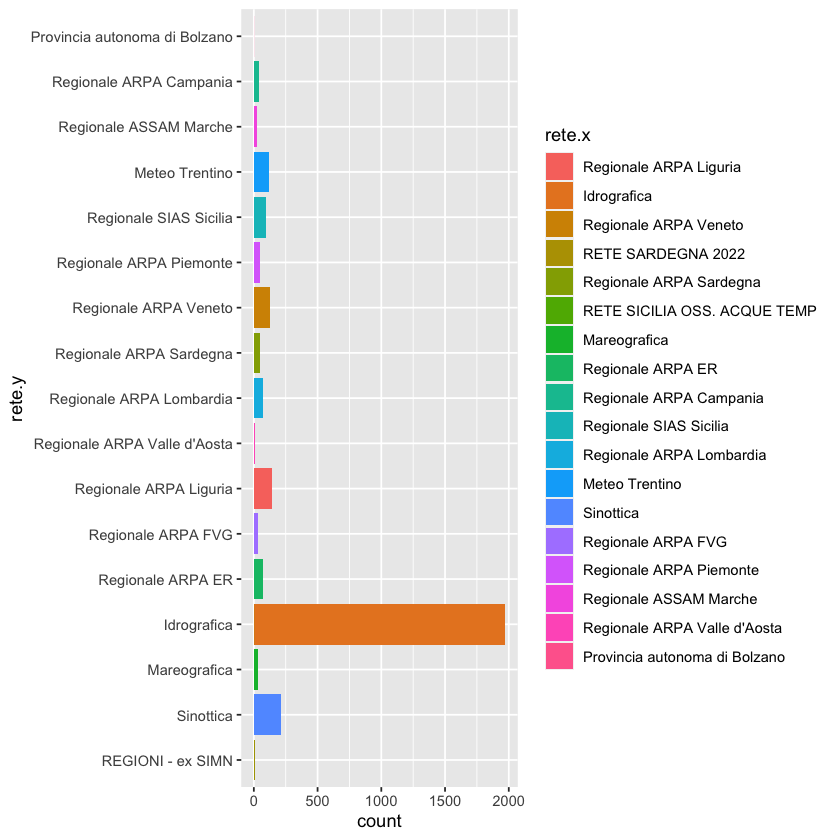

In [27]:
library(ggplot2)
bind_rows(
    joined.1,
    joined.2,
    joined.3,
    joined.4,
    joined.5,
    joined.6
) |> ggplot() + geom_bar(aes(y = rete.y, fill = rete.x))

In [47]:
spat <- st_join(m.scia, m.scia.off) |> st_drop_geometry()


In [37]:
library(stringr, warn.conflicts = FALSE)
inner_join(m.scia |> mutate(anagrafica = str_to_lower(anagrafica)), m.scia.off |> mutate(anagrafica = str_to_lower(anagrafica)), by = "anagrafica")


Warning message in inner_join(mutate(m.scia, anagrafica = str_to_lower(anagrafica)), :
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 1 of `x` matches multiple rows in `y`.
i Row 10697 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


identifier,last_year,first_year,net_code,user_code,elevation.x,valid_days,state,province,anagrafica,rete.x,rete.y,user_code2,lon,lat,elevation.y
<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
14716,2011,1988,54,OR009B001,317,8307,Sardegna,Oristano,abbasanta,RETE SARDEGNA 2022,REGIONI - ex SIMN,04166,8.819444,40.11667,317
14716,2011,1988,54,OR009B001,317,8307,Sardegna,Oristano,abbasanta,RETE SARDEGNA 2022,Idrografica,20166,8.818900,40.12550,313
7332,2010,1989,15,01133,1645,7300,Piemonte,Cuneo,acceglio,Idrografica,Idrografica,01133,6.981433,44.48515,1645
7650,2010,2004,15,01S4062,2000,1914,Piemonte,Cuneo,acceglio collet,Idrografica,Idrografica,01S4062,6.906438,44.52014,2000
12490,2022,2005,38,00078,1171,6237,Lazio,Rieti,accumoli,Regionale ARSIAL Lazio,REGIONI - ex SIMN,02148,13.236111,42.68333,858
14098,2021,1929,51,3150,194,29129,Sicilia,Catania,acireale,RETE SICILIA OSS. ACQUE TEMP,UCEA-UCOS,00286,15.166111,37.61333,208
14098,2021,1929,51,3150,194,29129,Sicilia,Catania,acireale,RETE SICILIA OSS. ACQUE TEMP,REGIONI - ex SIMN,04038,15.169444,37.60000,194
14098,2021,1929,51,3150,194,29129,Sicilia,Catania,acireale,RETE SICILIA OSS. ACQUE TEMP,Idrografica,193150,15.165228,37.62046,184
12491,2022,2004,38,00001,457,6897,Lazio,Viterbo,acquapendente,Regionale ARSIAL Lazio,REGIONI - ex SIMN,02649,11.869444,42.75000,425
